In [37]:
# Imports
import pandas as pd
import numpy as np

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv('data/fuel.csv')

# Create a new DataFrame with the transformed variables as required
new_data = pd.DataFrame()

new_data['Fuel'] = 1000 * data['FuelC'] / data['Pop']
new_data['Dlic'] = 1000 * data['Drivers'] / data['Pop']
new_data['Miles'] = np.log(data['Miles'])
new_data['Income'] = data['Income']
new_data = new_data[['Dlic', 'Miles', 'Income', 'Fuel']]

# A few representative data points
print(new_data.head())

# Extract data
X = new_data[['Dlic', 'Miles', 'Income']].values
y = new_data['Fuel'].values

          Dlic      Miles  Income        Fuel
0  1031.380067  11.455720   23471  690.264418
1  1031.641062   9.519882   30064  514.279223
2   908.597153  10.919533   25578  621.475071
3   946.570576  11.494069   22257  655.292668
4   844.703336  12.036298   32275  573.912855


In [38]:
data_len = len(X)
n_train = 40

X_train = np.array(X[:n_train])
Y_train = np.array(y[:n_train])

X_test = np.array(X[n_train:data_len])
Y_test = np.array(y[n_train:data_len])

In [39]:
k = 6

def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value, ord = 2, axis=1)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D, axis=0)[:k].flatten() 

In [40]:
Y_pred = np.zeros(len(X_test))

for i in range(len(X_test)):
    indices = find_nearest_index(X_train, X_test[i], k)
    Y_pred[i] = np.mean(Y_train[indices])
    print(f"{Y_pred[i]} | {Y_test[i]}")

655.9029512433245 | 711.7330576894062
638.4560580336707 | 697.0527770609517
638.4560580336706 | 638.2310609545192
611.9269910198954 | 681.100136591545
655.9029512433245 | 591.4999458878183
644.4898294882122 | 691.0227118608703
588.0444680617263 | 681.0311214380635
605.0998495739349 | 576.0697495580029
662.653139627235 | 562.4109333021843
584.9524291587197 | 581.7937169457123
644.4898294882122 | 842.7917524261421



Performance Metrics:
Mean Squared Error (MSE): 6956.3638
Mean Absolute Error (MAE): 65.3164
R-squared (R²): -0.1394


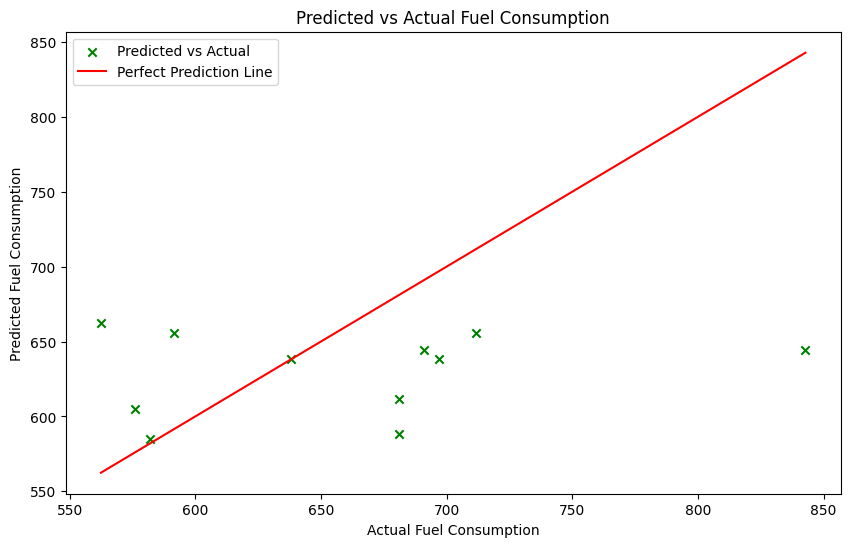

In [41]:
# Calculate performance metrics
mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("\nPerformance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

# Visualize Predicted vs Actual values
plt.figure(figsize=(10, 6))

# Plot Predicted vs Actual values
plt.scatter(Y_test, Y_pred, color='green', label='Predicted vs Actual', marker='x')

# Diagonal line for reference (perfect predictions)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', label='Perfect Prediction Line')

plt.xlabel('Actual Fuel Consumption')
plt.ylabel('Predicted Fuel Consumption')
plt.title('Predicted vs Actual Fuel Consumption')
plt.legend()
plt.show()